Logs  
- [2025/03/21]    
  This is an implementation of project risk problem from 
  (Negnevitsky, 2011)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

Generate the universe of discourse for all linguistic variables

In [ ]:
N_sample = 201      # This number of sample only for the plot and the resolution
                    # of membership function, you can increase this number
                    # to get more decimal places in your crisp output
x_project_fund = np.linspace(0, 16, N_sample)
y_project_staff =  np.linspace(0, 50, N_sample)
z_risk = np.linspace(0, 100, N_sample)

Generate fuzzy membership functions 

In [106]:
project_fund_inadeq = fuzz.trapmf(x_project_fund, [0, 0, 2, 7])
project_fund_marginal = fuzz.trimf(x_project_fund, [3, 8, 13])
project_fund_adeq = fuzz.trapmf(x_project_fund, [9, 14, 16, 16])

project_staff_small = fuzz.trapmf(y_project_staff, [0, 0, 10, 35])
project_staff_large = fuzz.trapmf(y_project_staff, [15, 40, 50, 50])

risk_low = fuzz.trapmf(z_risk, [0, 0, 20, 40])
risk_normal = fuzz.trapmf(z_risk, [25, 45, 55, 75])
risk_high = fuzz.trapmf(z_risk, [60, 80, 100, 100])

Visualize the universe of discourses and the memberships functions
for each linguistic variables

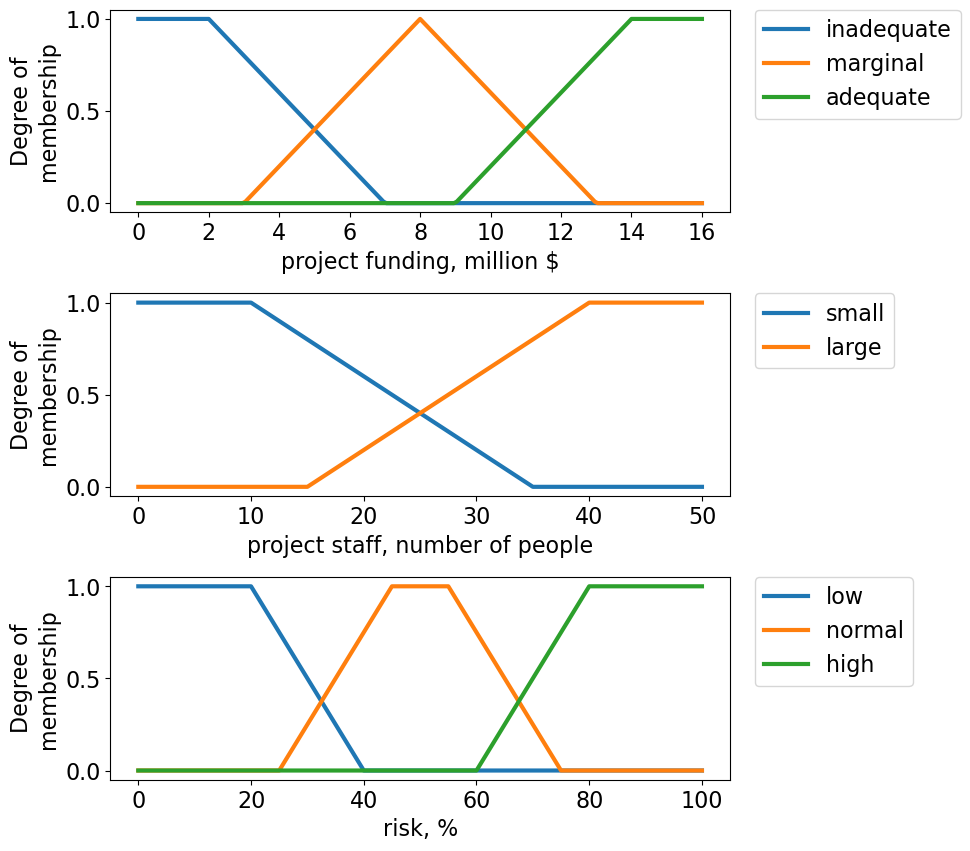

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

linewidth = 3

axes[0].plot(x_project_fund, project_fund_inadeq, linewidth=linewidth, label="inadequate")
axes[0].plot(x_project_fund, project_fund_marginal, linewidth=linewidth, label="marginal")
axes[0].plot(x_project_fund, project_fund_adeq, linewidth=linewidth, label="adequate")
axes[0].set_xlabel("project funding, million $")
axes[0].set_ylabel("Degree of\nmembership")
axes[0].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

axes[1].plot(y_project_staff, project_staff_small, linewidth=linewidth, label="small")
axes[1].plot(y_project_staff, project_staff_large, linewidth=linewidth, label="large")
axes[1].set_xlabel("project staff, number of people")
axes[1].set_ylabel("Degree of\nmembership")
axes[1].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

axes[2].plot(z_risk, risk_low, linewidth=linewidth, label="low")
axes[2].plot(z_risk, risk_normal, linewidth=linewidth, label="normal")
axes[2].plot(z_risk, risk_high, linewidth=linewidth, label="high")
axes[2].set_xlabel("risk, %")
axes[2].set_ylabel("Degree of\nmembership")
axes[2].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.subplots_adjust(hspace=0.4)
plt.show(fig)

Writing the fuzzy rules

In [108]:
def fuzzy_rules(x_input, y_input):
  
  mf_vals_inadeq = fuzz.interp_membership(x_project_fund, project_fund_inadeq, x_input)
  mf_vals_marginal = fuzz.interp_membership(x_project_fund, project_fund_marginal, x_input)
  mf_vals_adeq = fuzz.interp_membership(x_project_fund, project_fund_adeq, x_input)

  mf_vals_small = fuzz.interp_membership(y_project_staff, project_staff_small, y_input)
  mf_vals_large = fuzz.interp_membership(y_project_staff, project_staff_large, y_input)

  # -- rule 1
  risk_activation_low = np.fmax(mf_vals_adeq, mf_vals_small)
  risk_activation_low = np.fmin(risk_activation_low, risk_low)
  
  # -- rule 2
  risk_activation_normal = np.fmin(mf_vals_marginal, mf_vals_large)
  risk_activation_normal = np.fmin(risk_activation_normal, risk_normal)

  # -- rule 3
  risk_activation_high = mf_vals_inadeq
  risk_activation_high = np.fmin(risk_activation_high, risk_high)

  return risk_activation_low, risk_activation_normal, risk_activation_high


Calculate and visualize aggregated membership functions for 
specific inputs

In [ ]:
x_input = 4
y_input = 33
risk_activation_low, risk_activation_normal, risk_activation_high\
  = fuzzy_rules(x_input, y_input)

aggregated = np.fmax(risk_activation_low,
              np.fmax(risk_activation_normal, risk_activation_high))

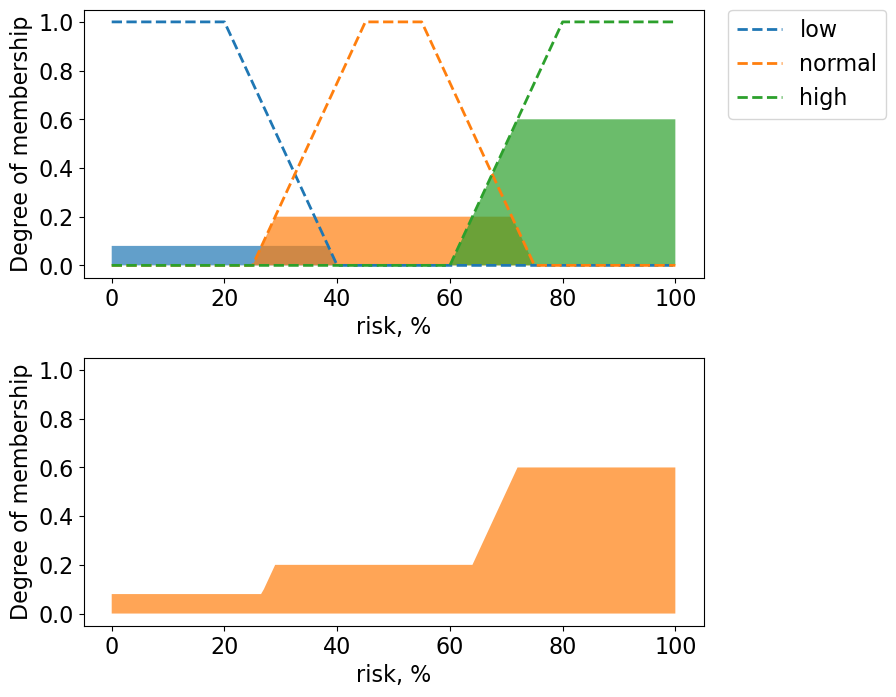

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axes[0].fill_between(z_risk, 0, risk_activation_low, facecolor="tab:blue", alpha=0.7)
axes[0].plot(z_risk, risk_low, "tab:blue", linestyle="--", linewidth=2, label="low")
axes[0].fill_between(z_risk, 0, risk_activation_normal, facecolor="tab:orange", alpha=0.7)
axes[0].plot(z_risk, risk_normal, "tab:orange", linestyle="--", linewidth=2, label="normal")
axes[0].fill_between(z_risk, 0, risk_activation_high, facecolor="tab:green", alpha=0.7)
axes[0].plot(z_risk, risk_high, "tab:green", linestyle="--", linewidth=2, label="high")

# ax.set_ylim([0, 1])
axes[0].set_xlabel("risk, %")
axes[0].set_ylabel("Degree of membership")
axes[0].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


axes[1].fill_between(z_risk, 0, aggregated, facecolor="tab:orange", alpha=0.7)
axes[1].set_xlabel("risk, %")
axes[1].set_ylim([-0.05, 1.05])
axes[1].set_xlabel("risk, %")
axes[1].set_ylabel("Degree of membership")

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

Defuzzification and visualization

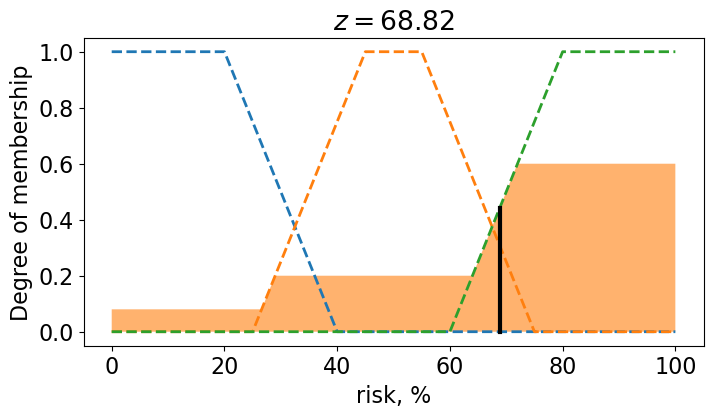

In [112]:
z_output = fuzz.defuzz(z_risk, aggregated, "centroid")
mf_vals_z_output = fuzz.interp_membership(z_risk, aggregated, z_output)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(z_risk, risk_low, linestyle="--", linewidth=2, label="low")
ax.plot(z_risk, risk_normal, linestyle="--", linewidth=2, label="normal")
ax.plot(z_risk, risk_high, linestyle="--", linewidth=2, label="high")

ax.fill_between(z_risk, 0, aggregated, facecolor="tab:orange", alpha=0.6)
ax.plot([z_output, z_output], [0, mf_vals_z_output], color="k", linewidth=3)

ax.set_title(f"$z = {z_output:.2f}$")
ax.set_xlabel("risk, %")
ax.set_ylabel("Degree of membership")

plt.show(fig)